In [63]:
#@title **Deep Learning Project**

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [65]:
# To load dataser
df=pd.read_csv("/content/drive/MyDrive/DL case/heart.csv")

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [67]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [69]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [70]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [71]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [72]:
#@title Data Visualization

<Axes: >

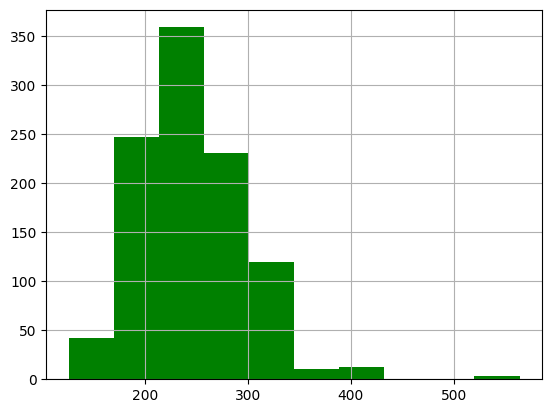

In [73]:
df['chol'].hist(color="green")

<Axes: xlabel='target', ylabel='count'>

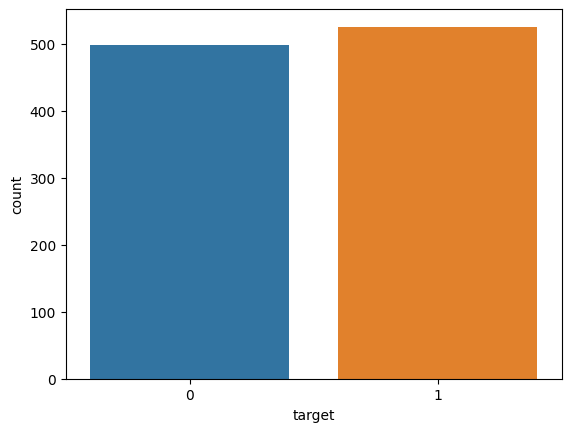

In [74]:
sns.countplot(df,x="target")

In [75]:
cate_val=[]
cont_val=[]

# creating 2 new object to store
# categorical column(cate_val)
# and other to store numerical column(cont_val)

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

sex
1    713
0    312
Name: sex, dtype: int64


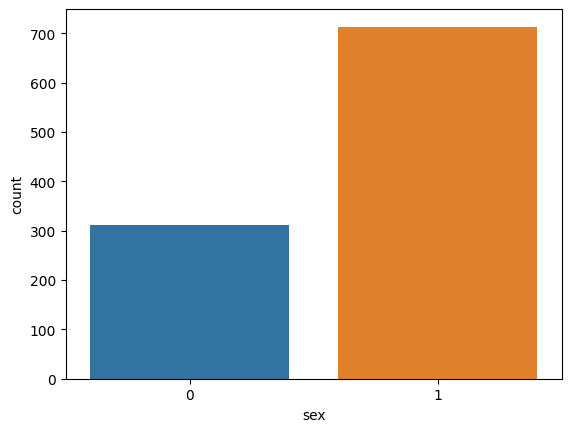

cp
0    497
2    284
1    167
3     77
Name: cp, dtype: int64


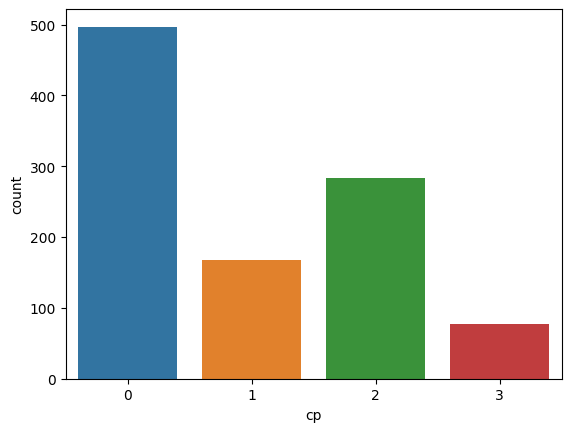

fbs
0    872
1    153
Name: fbs, dtype: int64


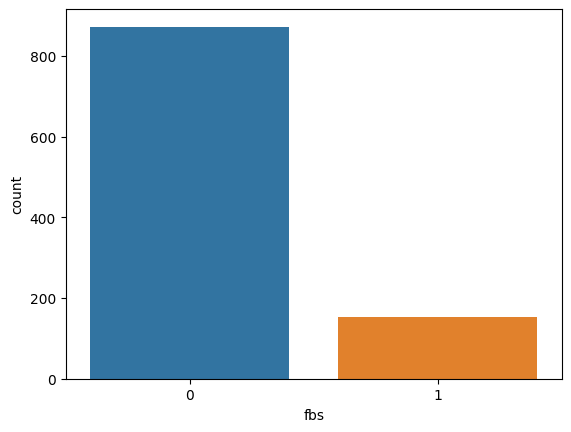

restecg
1    513
0    497
2     15
Name: restecg, dtype: int64


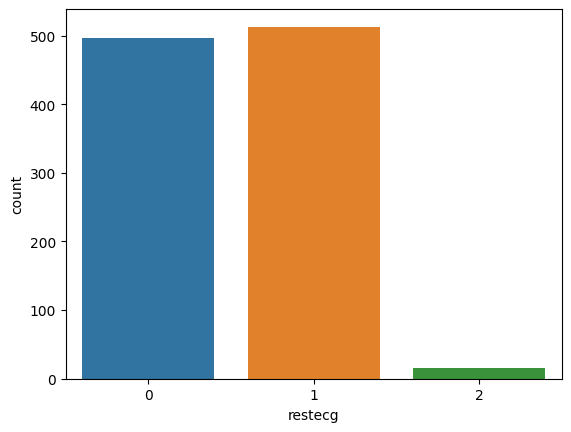

exang
0    680
1    345
Name: exang, dtype: int64


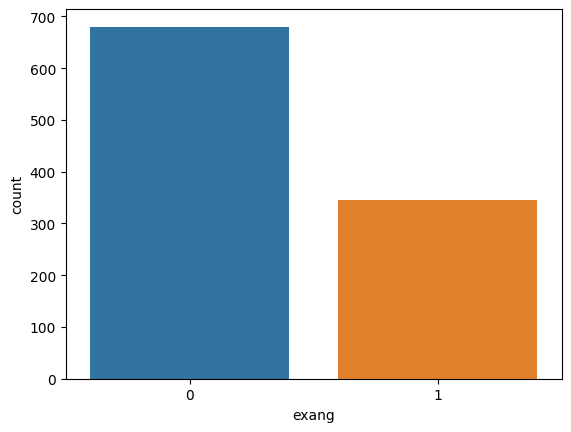

slope
1    482
2    469
0     74
Name: slope, dtype: int64


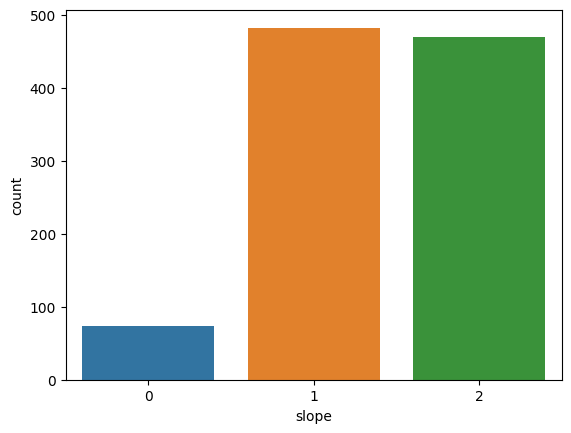

ca
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64


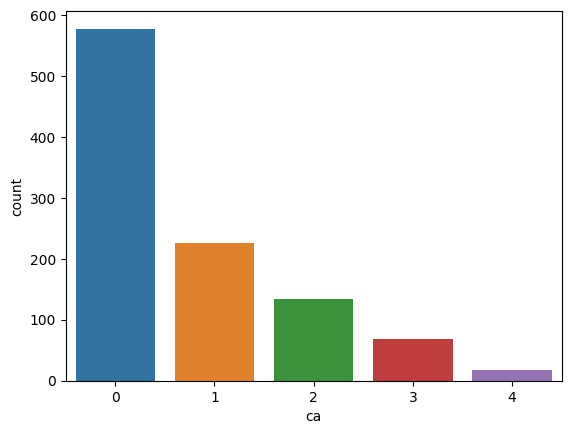

thal
2    544
3    410
1     64
0      7
Name: thal, dtype: int64


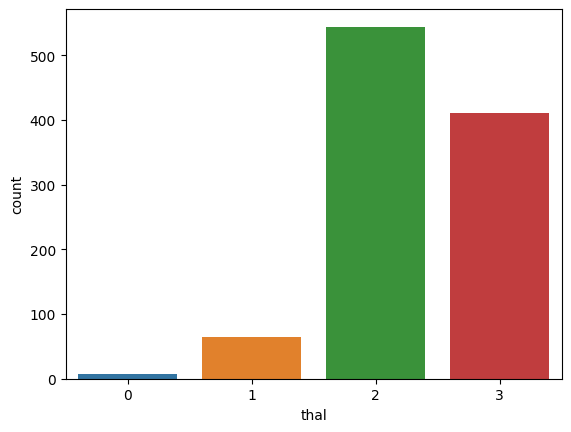

target
1    526
0    499
Name: target, dtype: int64


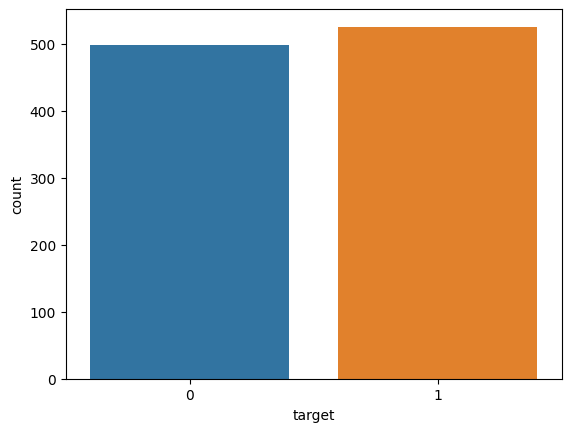

In [76]:
for col in df[cate_val]:
    print(col)
    print(df[col].value_counts())
    
    sns.countplot(df,x=col)
    plt.show()

In [77]:
x=df.drop("target",axis=1)
y=df["target"]

In [78]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(717, 13)
(308, 13)
(717,)
(308,)


In [79]:
y.value_counts()

1    526
0    499
Name: target, dtype: int64

In [80]:
xtrain.ndim,type(xtrain)

(2, pandas.core.frame.DataFrame)

In [81]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [82]:
xtrain.ndim,type(xtrain)

(2, numpy.ndarray)

In [83]:
x.shape

(1025, 13)

In [84]:
#create a neural network
#first create a object of Sequential class and pass the no. of layers in list inside the class
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=13,activation='relu', input_shape=(x.shape[1],)), #first hidden layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')  #output layer
])

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 13)                182       
                                                                 
 dense_8 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [86]:
#compile the model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=["accuracy"])

In [87]:
# Create EarlyStopping
from keras.callbacks import EarlyStopping
# create object of earlystopping class
es=EarlyStopping(monitor="val_loss",         #val_loss means testing loss
                 min_delta=0.00001,          #value of lambda
                 patience=20,
                 verbose=1,
                 mode="auto",
                 baseline=None,
                 restore_best_weights=False
)

In [88]:
#Train the model and also check either model is overfit/not overfit
trained_model=model.fit(xtrain,ytrain,epochs=5000,callbacks=es,
                        validation_data=(xtest,ytest))
#trained_model is user defined object

Epoch 1/5000
23/23 [==============================] - 1s 11ms/step - loss: 0.7654 - accuracy: 0.4742 - val_loss: 0.7398 - val_accuracy: 0.5130
Epoch 2/5000
23/23 [==============================] - 0s 4ms/step - loss: 0.7228 - accuracy: 0.5146 - val_loss: 0.7004 - val_accuracy: 0.5552
Epoch 3/5000
23/23 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5425 - val_loss: 0.6685 - val_accuracy: 0.5552
Epoch 4/5000
23/23 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.5858 - val_loss: 0.6418 - val_accuracy: 0.6266
Epoch 5/5000
23/23 [==============================] - 0s 4ms/step - loss: 0.6334 - accuracy: 0.6388 - val_loss: 0.6184 - val_accuracy: 0.6526
Epoch 6/5000
23/23 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.6709 - val_loss: 0.5981 - val_accuracy: 0.7045
Epoch 7/5000
23/23 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.7071 - val_loss: 0.5798 - val_accuracy: 0.6948
Epoch

In [89]:
#Evaluating of training data
model.evaluate(xtrain,ytrain)

23/23 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9805


[0.09394492954015732, 0.9804741740226746]

In [90]:
#evaluation of testing data
model.evaluate(xtest,ytest)

10/10 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9545


[0.16580042243003845, 0.9545454382896423]

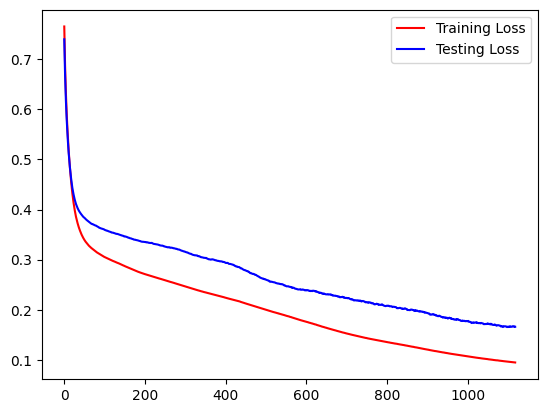

In [91]:
#Visualization training loss and testing loss(val_loss)
plt.plot(trained_model.history["loss"],color="red",label="Training Loss")
plt.plot(trained_model.history["val_loss"],color="blue",label="Testing Loss")
plt.legend()
plt.show()

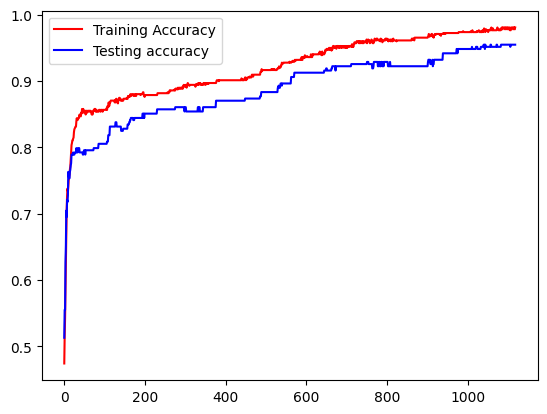

In [92]:
plt.plot(trained_model.history["accuracy"],color="red",label="Training Accuracy")
plt.plot(trained_model.history["val_accuracy"],color="blue",label="Testing accuracy")
plt.legend()
plt.show()

In [93]:
# To predict or testing the model with 30% data
ypred=model.predict(xtest).round(2)
#formula: yred=1/(1+np.exp(-xtest))
#its return probability's value

10/10 [==============================] - 0s 2ms/step


In [94]:
ypred

array([[0.02],
       [1.  ],
       [0.99],
       [0.99],
       [0.  ],
       [0.99],
       [0.99],
       [0.99],
       [0.18],
       [1.  ],
       [0.2 ],
       [0.05],
       [1.  ],
       [0.01],
       [0.01],
       [0.96],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.99],
       [0.02],
       [0.06],
       [0.01],
       [0.2 ],
       [0.99],
       [0.01],
       [0.99],
       [0.  ],
       [0.82],
       [1.  ],
       [0.71],
       [0.  ],
       [0.49],
       [0.31],
       [0.99],
       [0.78],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.89],
       [0.31],
       [0.  ],
       [1.  ],
       [0.02],
       [1.  ],
       [0.98],
       [0.78],
       [0.85],
       [1.  ],
       [0.93],
       [0.3 ],
       [0.76],
       [0.91],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.02],
       [0.99],
       [0.  ],
       [0.31],
       [0.14],
       [1.  ],
       [0.29],
       [0.

In [95]:
dict={"Actual output":ytest}
#converts dict into DataFrame
df1=pd.DataFrame(dict)
df1.head(10)
# To add new column for ypred
df1["Predicted_output"]=ypred
df1.head(10)

,Actual output,Predicted_output
49,0,0.02
525,1,1.00
119,1,0.99
629,0,0.99
186,0,0.00
691,1,0.99
473,1,0.99
422,1,0.99
27,0,0.18
815,1,1.00


In [96]:
xtest

array([[ 0.61962048,  0.66969011, -0.92148277, ...,  0.98203033,
         1.2292984 ,  1.10232353],
       [-0.38500539, -1.49322796,  1.08368611, ...,  0.98203033,
        -0.72071698, -0.52060454],
       [-1.38963126,  0.66969011,  0.08110167, ...,  0.98203033,
        -0.72071698, -0.52060454],
       ...,
       [ 1.06612087, -1.49322796,  1.08368611, ...,  0.98203033,
        -0.72071698,  1.10232353],
       [-1.38963126,  0.66969011, -0.92148277, ...,  0.98203033,
        -0.72071698, -0.52060454],
       [-0.38500539,  0.66969011,  1.08368611, ...,  0.98203033,
         0.25429071,  1.10232353]])

In [97]:
ytest.ndim

1

In [98]:
ypred.ndim

2

In [99]:
ypred=np.where(ypred>=0.5,1,0)
ypred

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [100]:
dict={"Actual output":ytest}
#converts dict into DataFrame
df1=pd.DataFrame(dict)
df1.head(10)
# To add new column for ypred
df1["Predicted_output"]=ypred
df1.head(20)

,Actual output,Predicted_output
49,0,0
525,1,1
119,1,1
629,0,1
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [101]:
#generate classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       161
           1       0.92      0.99      0.95       147

    accuracy                           0.95       308
   macro avg       0.96      0.96      0.95       308
weighted avg       0.96      0.95      0.95       308



In [102]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[148  13]
 [  1 146]]


In [103]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=13,activation="relu",input_shape=(x.shape[1],)),
    tf.keras.layers.Dense(units=12,activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

In [104]:
model1.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [105]:
trained_model1=model1.fit(xtrain,ytrain, callbacks=es, epochs=5000, validation_data=(xtest,ytest))

Epoch 1/5000
23/23 [==============================] - 1s 10ms/step - loss: 0.7654 - accuracy: 0.4491 - val_loss: 0.7156 - val_accuracy: 0.4968
Epoch 2/5000
23/23 [==============================] - 0s 4ms/step - loss: 0.7171 - accuracy: 0.4756 - val_loss: 0.6829 - val_accuracy: 0.5065
Epoch 3/5000
23/23 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.5049 - val_loss: 0.6595 - val_accuracy: 0.5455
Epoch 4/5000
23/23 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.5593 - val_loss: 0.6404 - val_accuracy: 0.5974
Epoch 5/5000
23/23 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.6192 - val_loss: 0.6237 - val_accuracy: 0.6234
Epoch 6/5000
23/23 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.6709 - val_loss: 0.6083 - val_accuracy: 0.6429
Epoch 7/5000
23/23 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.6904 - val_loss: 0.5939 - val_accuracy: 0.6623
Epoch

In [106]:
model1.evaluate(xtrain,ytrain)

23/23 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9958


[0.042053282260894775, 0.9958158731460571]

In [107]:
model1.evaluate(xtest,ytest)

10/10 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9708


[0.11593691259622574, 0.9707792401313782]

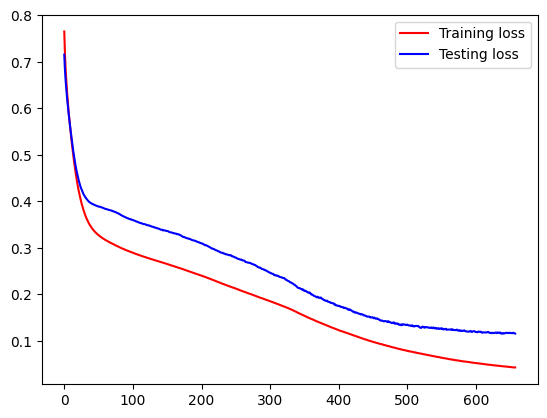

In [108]:
plt.plot(trained_model1.history["loss"],color="red",label="Training loss")
plt.plot(trained_model1.history["val_loss"],color="blue",label="Testing loss")
plt.legend()
plt.show()

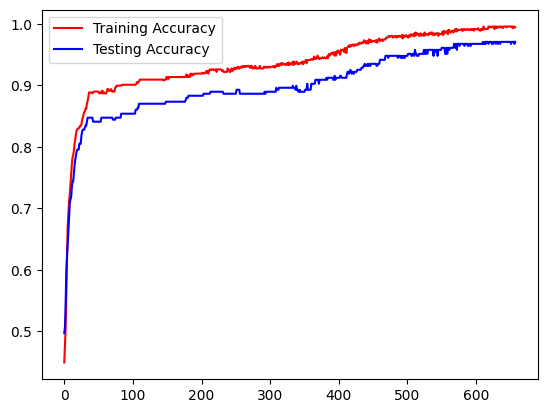

In [109]:
plt.plot(trained_model1.history["accuracy"],color="red",label="Training Accuracy")
plt.plot(trained_model1.history["val_accuracy"],color="blue",label="Testing Accuracy")
plt.legend()
plt.show()

In [110]:
ypred=model1.predict(xtest)
ypred

10/10 [==============================] - 0s 2ms/step


array([[7.10656095e-05],
       [9.97173250e-01],
       [9.96188104e-01],
       [9.88194287e-01],
       [5.74791738e-05],
       [9.97197688e-01],
       [9.92854714e-01],
       [9.95424092e-01],
       [8.26358050e-02],
       [9.88651514e-01],
       [3.64391319e-02],
       [2.23764554e-02],
       [9.99613225e-01],
       [5.40059060e-03],
       [1.01760104e-02],
       [9.62936163e-01],
       [4.20187725e-08],
       [9.99819994e-01],
       [6.32273389e-09],
       [9.88651514e-01],
       [9.95141387e-01],
       [7.10656095e-05],
       [1.60043314e-03],
       [2.20910180e-02],
       [3.64391319e-02],
       [9.99039531e-01],
       [2.42697541e-03],
       [9.91573334e-01],
       [1.44806458e-04],
       [9.97653782e-01],
       [9.99957740e-01],
       [8.11173201e-01],
       [2.58089889e-14],
       [3.16124260e-01],
       [1.59033313e-02],
       [9.55973566e-01],
       [9.27648723e-01],
       [1.12890778e-03],
       [3.76090547e-03],
       [9.99747097e-01],


In [111]:
ypred=np.where(ypred>=0.5,1,0)
ypred

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [114]:
dict={"Actual output":ytest}
#converts dict into DataFrame
df1=pd.DataFrame(dict)
df1.head(10)
# To add new column for ypred
df1["Predicted_output"]=ypred
df1.head(10)

,Actual output,Predicted_output
49,0,0
525,1,1
119,1,1
629,0,1
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [112]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       161
           1       0.94      1.00      0.97       147

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [113]:
print(confusion_matrix(ytest,ypred))

[[152   9]
 [  0 147]]
